Importanto bibliotecas necessárias

In [1706]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Introdução


**Contextualização**

- *Taxa de desemprego:* Percentual da população de 16 anos e mais, economicamente ativa, desocupada.
- *Coef. de Aids*: Obtos por Aids a cada 100 mil habitantes.
- ***Porcentagem de pobres:*** O salário mínimo do último ano para o qual a série está sendo calculada torna-se a referência para toda a série. Esse valor é corrigido para todos com base no INPC de julho de 2010, alterando o valor da linha de pobreza e consequentemente a proporção de pobres. Nesta tabela, o valor de referência, salário mínimo de 2010, é de R$ 510,00.
- ***Taxa de incidencia de Tuberlose:***
Taxa de incidência: casos por 100.000 habitantes
Informações apresentadas segundo local de residência e ano do diagnóstico; considerados os casos com tipo de entrada igual a "caso novo" ou "não sabe".
Situação da base de dados em novembro/2013. Dados de 2001 a 2010 atualizados em realização ao IDB anterior.
Nas tabulações por faixa etária ou sexo, estão suprimidos os casos com faixa etária ou sexo ignorados, respectivamente.
- ***Indice Gini:***


**Tema e Objetivo**


**Base de Dados**


#### **Limpando os Dataframes extraídos do DataSUS**

Importando os Dataframes:

In [1707]:
desemprego0 = pd.read_excel('planilhas capitais/%_desemprego.xlsx')
pobres_brancos_negros0 = pd.read_excel('planilhas capitais/%_pobres_brancos_negros2.xlsx')
indice_gini0 = pd.read_excel('planilhas capitais/Indice_Gini_2010.xlsx')
aids0 = pd.read_excel('planilhas capitais/Coef_ObtosPorAids.xlsx')
analfabetismo0 = pd.read_excel('planilhas capitais/%_anafabetismo.xlsx')
turbeculoseobtos0 = pd.read_excel('planilhas capitais/Coef_ObtosPorTurbeculose.xlsx')
IDH0 = pd.read_excel('planilhas capitais/IDH_IBGE.xlsx')
pop_total0 = pd.read_excel('planilhas capitais/Pop_Residente.xlsx')



c:\Users\rafal\anaconda3\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


Deletando Colunas que não seram utilizadas:

In [1708]:
del IDH0['Código da Unidade da Federação']
del IDH0['Código IBGE da Mesoregião']
del IDH0['Nome da Mesoregião']
del IDH0['Código IBGE da Microregião']
del IDH0['Nome da Microregião']
del IDH0['IDHM 1991']
del IDH0['IDHM 2000']

del indice_gini0[1991]
del indice_gini0[2000]

Removendo as últimas linhas

In [1709]:
df_desemprego0 = desemprego0.drop(desemprego0.index[-6:])
df_pobres0 = pobres_brancos_negros0.drop(pobres_brancos_negros0.index[-9:])
df_indice_gini0= indice_gini0.drop(indice_gini0.index[-2:])
df_aids0 = aids0.drop(aids0.index[-9:])
df_analfabetismo0 = analfabetismo0.drop(analfabetismo0.index[-10:])
df_poptotal0 = pop_total0.drop(pop_total0.index[-13:])
df_obtostubrculose0= turbeculoseobtos0.drop(turbeculoseobtos0.index[-9:])

Renomeando Colunas:

In [1710]:
df_pobres = df_pobres0.rename(columns={'Parda': 'Pop. Pobre Parda', 'Total': 'Pop. Pobre Total','Branca': 'Pop. Pobre Branca','Preta': 'Pop. Pobre Preta'})
df_aids = df_aids0.rename(columns={'TME_p/aids': 'Coef. de Obtos por Aids'})
df_analfabetismo = df_analfabetismo0.rename(columns={'Taxa_de_analfabetismo_(15a_e+)': 'Tx. Analfabetismo'})
df_desemprego = df_desemprego0.rename(columns={'Tx_desemprego_16_anos_e_+_(%)': 'Tx. Desemprego'})
df_gini = df_indice_gini0.rename(columns={2010: 'Indice Gini'})
df_IDH = IDH0.rename(columns={'Código IBGE do Município': 'Codigo da Capital'})
df_poptotal = df_poptotal0.rename(columns={'População_residente': 'Pop. Residente'})
df_obtostubrculose = df_obtostubrculose0.rename(columns={'TME_p/tuberculose':'Obtos Tuberculose'})

Funções Utilizadas:


In [1711]:
#Separa as colunas das planilhas que possuem o Código da Cidade e o Nome da Cidade na mesma célula:
def separa_codigo(planilha):
    colunas = list(planilha)
    if "Capital" in colunas:
        planilha[['Codigo da Capital', 'Capital']] = planilha['Capital'].str.split(' ', n=1, expand=True)
        planilha_limpa = planilha
        
    else: 
        planilha_limpa = planilha
    return planilha_limpa

In [1712]:
df_poptotal1 = separa_codigo(df_poptotal)

Mergindo o DataFrame

In [1713]:
df_poptotal1["Codigo da Capital"] = df_poptotal1['Codigo da Capital'].astype(int)
result = pd.merge(df_poptotal, df_IDH, how='inner', on='Codigo da Capital')
result_0 = pd.merge(result, df_obtostubrculose, how='inner', on='Capital')
result_1 = pd.merge(result_0, df_gini, how='inner', on='Capital')
result_2 = pd.merge(result_1, df_pobres, how='inner', on='Capital')
result_3 = pd.merge(result_2, df_desemprego, how='inner', on='Capital')
result_4 = pd.merge(result_3, df_aids, how='inner', on='Capital')
result_5 = pd.merge(result_4, df_analfabetismo, how='inner', on='Capital')

#### **A bases de dados pronta**

In [1714]:
df = result_5

In [1715]:
df1 = df.copy()
df2 = df1.sort_values(by='Capital', ascending=True)

In [1716]:
df2

,Capital,Pop. Residente,Codigo da Capital,Sigla da Unidade da Federação,Nome das Grandes Regiões,IDHM 2010,Obtos Tuberculose,Indice Gini,Pop. Pobre Branca,Pop. Pobre Preta,Pop. Pobre Parda,Pop. Pobre Total,Tx. Desemprego,Coef. de Obtos por Aids,Tx. Analfabetismo
14,Aracaju,571149.0,280030,SE,Nordeste,0.770,2.3,0.6341,9.90,15.04,14.42,12.92,10.71,4.6,6.59
16,Belo Horizonte,2375151.0,310620,MG,Sudeste,0.810,0.9,0.6106,4.22,6.76,6.86,5.61,6.21,5.4,2.80
4,Belém,1393399.0,150140,PA,Norte,0.746,3.4,0.6284,11.44,15.37,16.87,15.28,10.07,13.7,3.31
3,Boa Vista,284313.0,140010,RR,Norte,0.752,0.7,0.5936,10.65,17.78,15.47,14.76,7.33,8.4,5.66
26,Brasília,2570160.0,530010,DF,Centro-Oeste,0.824,0.5,0.6370,5.32,7.55,7.96,6.77,7.83,4.6,3.59
23,Campo Grande,786797.0,500270,MS,Centro-Oeste,0.784,2.3,0.5720,4.27,6.02,6.60,5.40,6.22,8.6,3.80
24,Cuiabá,551098.0,510340,MT,Centro-Oeste,0.785,3.8,0.6008,5.31,9.13,8.85,7.65,6.41,12.0,4.46
20,Curitiba,1751907.0,410690,PR,Sul,0.823,0.6,0.5652,3.51,4.71,5.44,3.87,4.61,8.0,2.09
21,Florianópolis,421240.0,420540,SC,Sul,0.847,1.9,0.5474,2.33,2.65,4.47,2.57,4.81,15.7,1.94
9,Fortaleza,2452185.0,230440,CE,Nordeste,0.754,4.9,0.6267,9.85,19.04,15.60,13.61,7.53,4.5,6.82


In [1717]:
df2["Obtos Tuberculose"] = df2['Obtos Tuberculose'].astype(float)
df2.dtypes

Capital                           object
Pop. Residente                   float64
Codigo da Capital                  int32
Sigla da Unidade da Federação     object
Nome das Grandes Regiões          object
IDHM 2010                        float64
Obtos Tuberculose                float64
Indice Gini                      float64
Pop. Pobre Branca                float64
Pop. Pobre Preta                 float64
Pop. Pobre Parda                 float64
Pop. Pobre Total                 float64
Tx. Desemprego                   float64
Coef. de Obtos por Aids          float64
Tx. Analfabetismo                float64
dtype: object

In [1718]:
var_quantitativas = df2.select_dtypes(include = ['float']) 
var_qualitativas = df2.select_dtypes(include = ['object']) 

In [1719]:
var_quantitativas

,Pop. Residente,IDHM 2010,Obtos Tuberculose,Indice Gini,Pop. Pobre Branca,Pop. Pobre Preta,Pop. Pobre Parda,Pop. Pobre Total,Tx. Desemprego,Coef. de Obtos por Aids,Tx. Analfabetismo
14,571149.0,0.770,2.3,0.6341,9.90,15.04,14.42,12.92,10.71,4.6,6.59
16,2375151.0,0.810,0.9,0.6106,4.22,6.76,6.86,5.61,6.21,5.4,2.80
4,1393399.0,0.746,3.4,0.6284,11.44,15.37,16.87,15.28,10.07,13.7,3.31
3,284313.0,0.752,0.7,0.5936,10.65,17.78,15.47,14.76,7.33,8.4,5.66
26,2570160.0,0.824,0.5,0.6370,5.32,7.55,7.96,6.77,7.83,4.6,3.59
23,786797.0,0.784,2.3,0.5720,4.27,6.02,6.60,5.40,6.22,8.6,3.80
24,551098.0,0.785,3.8,0.6008,5.31,9.13,8.85,7.65,6.41,12.0,4.46
20,1751907.0,0.823,0.6,0.5652,3.51,4.71,5.44,3.87,4.61,8.0,2.09
21,421240.0,0.847,1.9,0.5474,2.33,2.65,4.47,2.57,4.81,15.7,1.94
9,2452185.0,0.754,4.9,0.6267,9.85,19.04,15.60,13.61,7.53,4.5,6.82


**Correlação através de um HeatMap**

<AxesSubplot:>

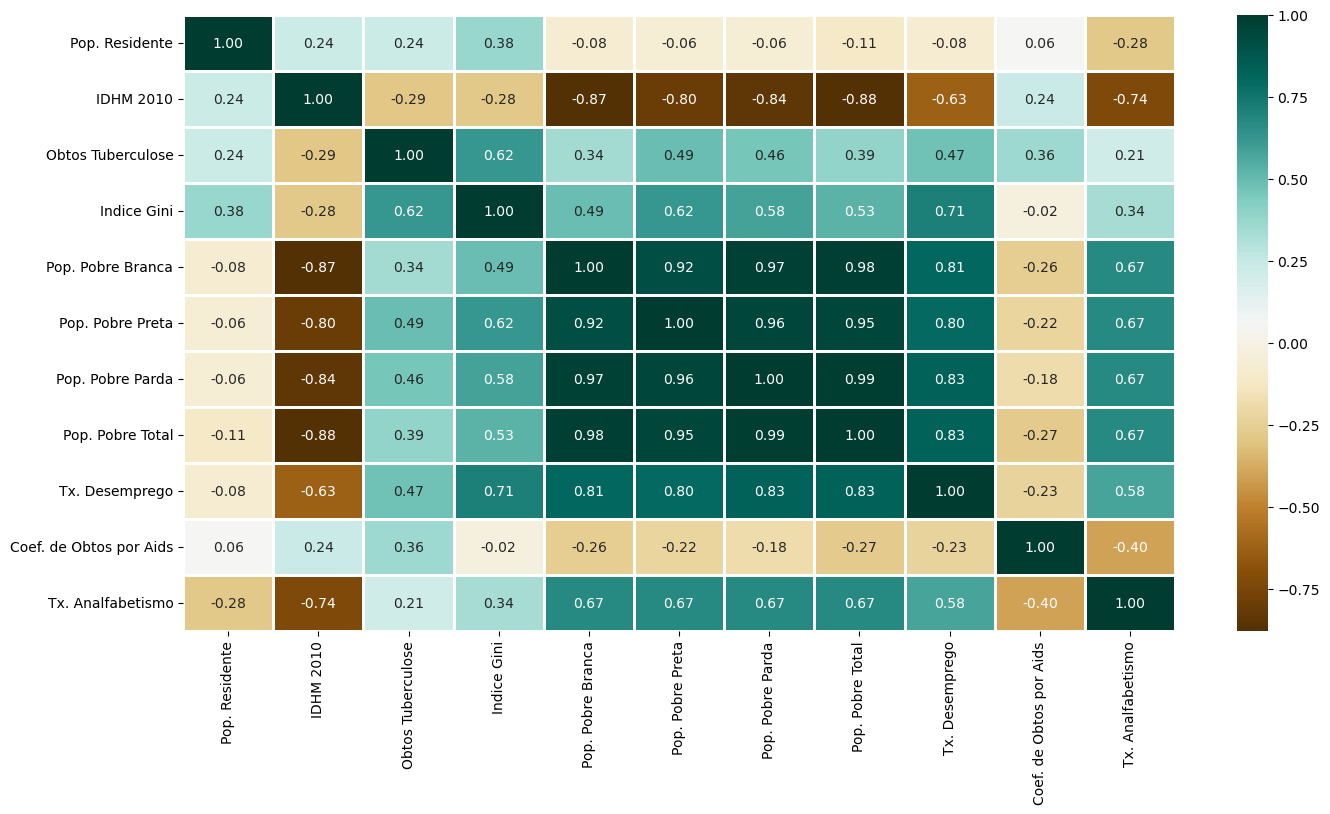

In [1720]:
plt.figure(figsize=(16, 8))

sns.heatmap(var_quantitativas.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

c:\Users\rafal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


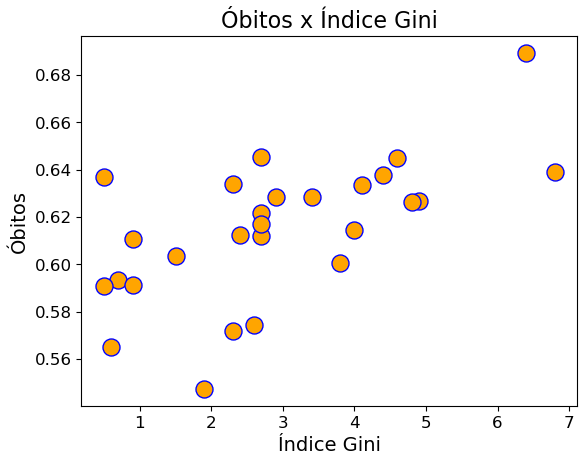

In [1721]:
plot1 = sns.scatterplot(df2['Obtos Tuberculose'], df2['Indice Gini'], data = df2, color = 'orange', edgecolor = 'b', s = 150)
plt.title('Óbitos x Índice Gini', fontsize = 16)
plt.xlabel('Índice Gini', fontsize = 14)
plt.ylabel('Óbitos', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.savefig('scatter1.png')
plt.show()



In [1722]:

y= var_quantitativas['Obtos Tuberculose']
for i in var_qualitativas.columns:
    i = var_qualitativas.columns

    plot1 = sns.scatterplot(i, y, data = var_qualitativas, color = 'orange', edgecolor = 'b', s = 150)
    plt.title('{} / Sale Price'.format(i), fontsize = 16)
    plt.xlabel('{}'.format(i), fontsize = 14)
    plt.ylabel('Sale Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter1.png')
    plt.show()


c:\Users\rafal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: Length of Index vectors must match length of `data` when both are used, but `data` has length 27 and the vector passed to `x` has length 3.

In [ ]:
dataset = df2

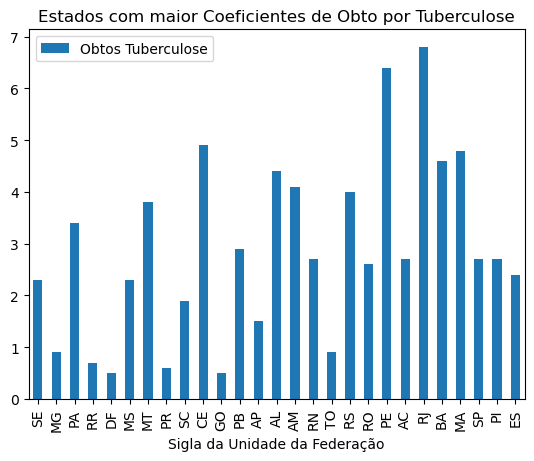

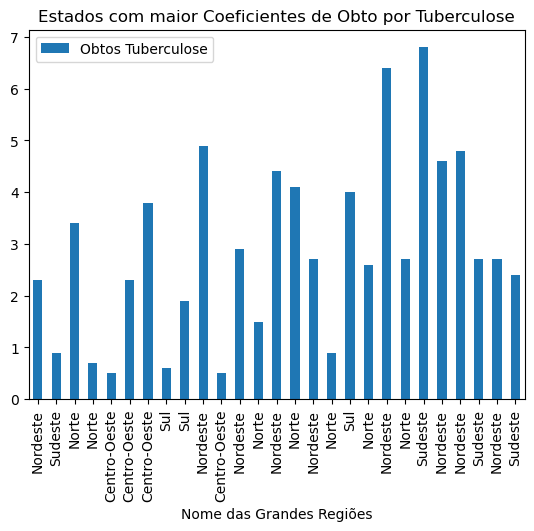

In [ ]:
dataset.plot(kind='bar',x='Sigla da Unidade da Federação', y='Obtos Tuberculose')
plt.title('Estados com maior Coeficientes de Obto por Tuberculose')
plt.show()


dataset.plot(kind='bar',x='Nome das Grandes Regiões', y='Obtos Tuberculose')
plt.title('Estados com maior Coeficientes de Obto por Tuberculose')
plt.show()


### Dicionário:

- **Jogado em terreno baldio ou logradouro:** Número de moradores por lixo jogado em terreno baldio ou logradouro
- **Jogado em rio, lago ou mar:** Número de moradores por lixo jogado em rio, lago ou mar
- **Cobertura Vacinal** Porcentagem de Vacinas com Cobertura Adequada por município



**Estrutura do Projeto**

Serão exploradas técnicas de regressão para a previsão da variável quantitativa "Quantidade de Desistência no Curso". A qualidade da comunicação e apresentação dos resultados também será uma prioridade, assegurando que os resultados sejam compreensíveis para um público amplo.

Este projeto tem como objetivo fornecer previsões robustas e ir além de uma simples análise exploratória de dados. Espera-se que a análise e modelos desenvolvidos ajudem a entender e prever as desistências em cursos de graduação, o que pode ter implicações importantes na melhoria da Educação Superior.

### Merge dos Dados

# Pergunta

Com base no arquivo de 2008, a gente vê se aqueles fatores ainda estão influenciando em 2010


### Data Processing

# Minerando Dados e Características do Dataset

# Modelos de Predição

# Processo e Estatísticas de Validação

# Conclusão 

# Referências Bibliográficas